<a href="https://colab.research.google.com/github/nichakornchaisuwan/multivariaet/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Scaling





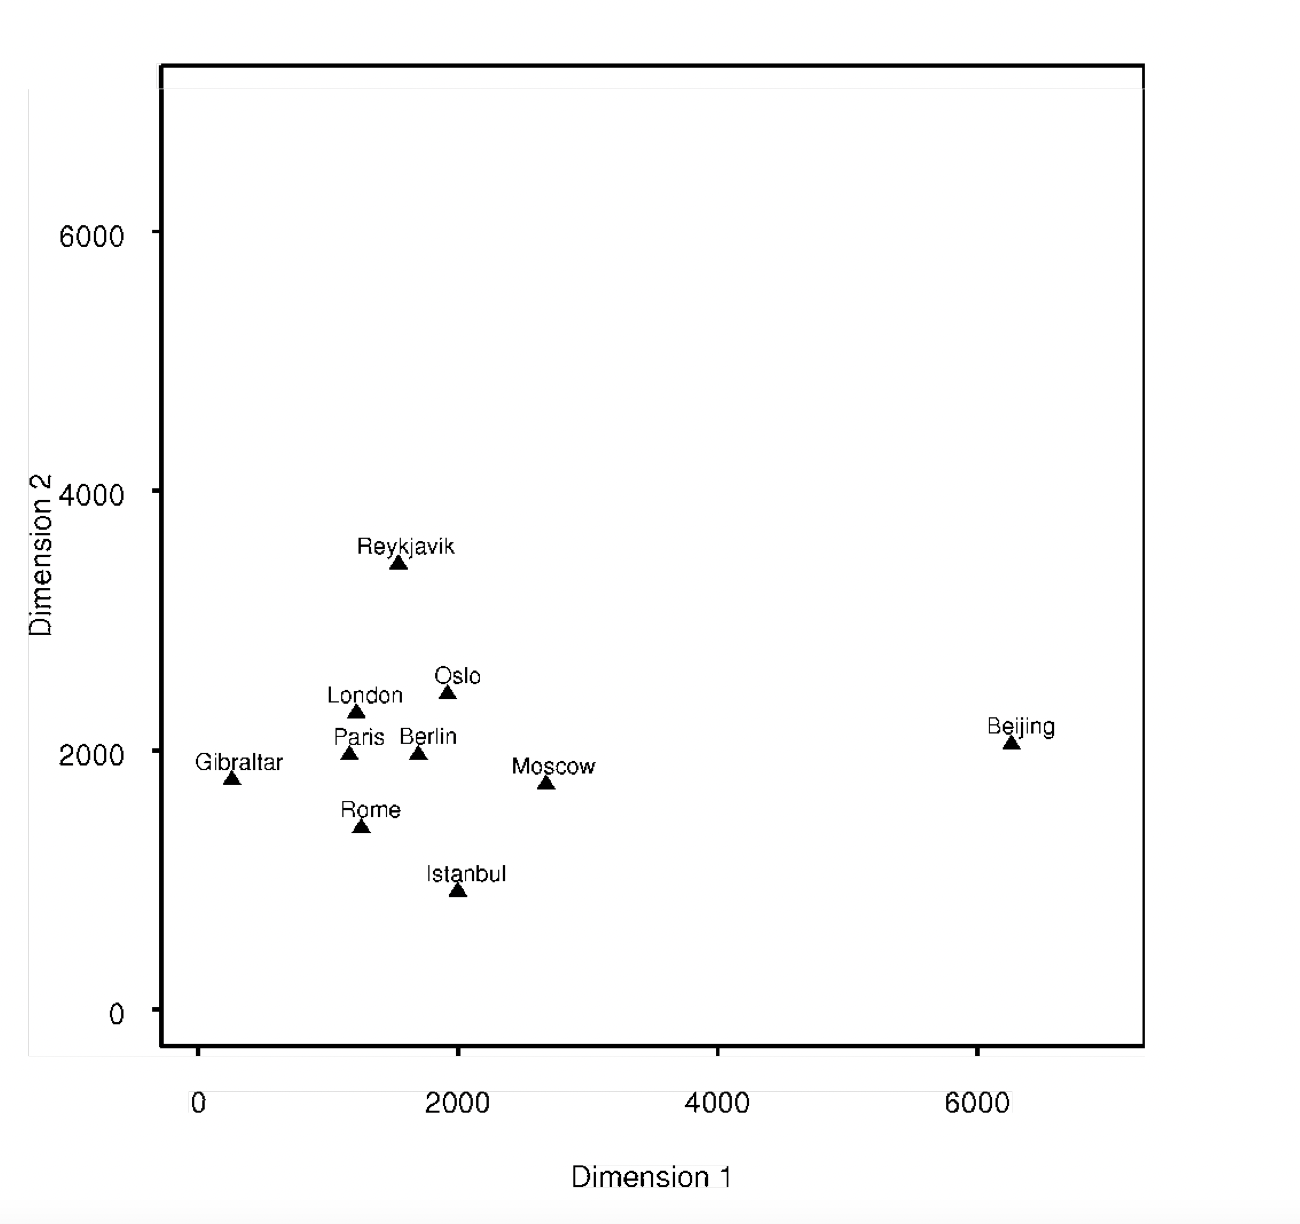

## Example on Iris dataset

### อ่านข้อมูลจากไฟล์

In [1]:
import pandas as pd

In [2]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df 

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### ลอง plot PCA เพื่อเปรียบเทียบกับวิธี MDS

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2) #=2 หมายถึงต้องการ 2 ไดเมนชั่น 

In [7]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1]) #เอาทุก column ยกเว้น column สุดท้าย เนื่องจาก column เป็นตัวหนังสือไม่ใช่ตัวเลขที่สามารถคำนวนได้

In [8]:
from matplotlib import pyplot as plt 

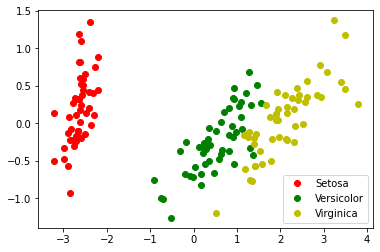

In [9]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label = 'Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og',label = 'Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy',label = 'Virginica');
plt.legend() # plot กราฟเพื่อดูการกระจายของข้อมูล พร้อมทั้งระบุชื่อของข้อมูลแต่ละตัว

## MDS (Multidimensional Scaling)

### Distance #ระยะห่างระหว่างจุด

In [ ]:
ฃX1=example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [ ]:
X2=example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [ ]:
import numpy as np

In [ ]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

###Distance Matrix #ระยะห่างแต่ละจุด

In [ ]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

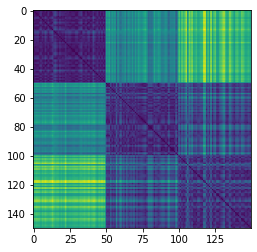

In [ ]:
plt.imshow(dis_matrix); #แต่ละจุดมาพลอต ค่ามากสว่าง ค่าน้อยเข้ม

###ทำ MDS

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

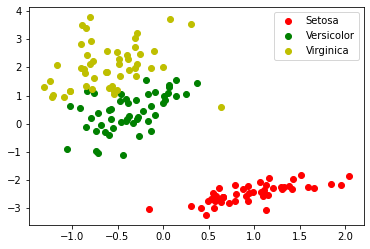

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label = 'Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label = 'Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label = 'Virginica');
plt.legend()

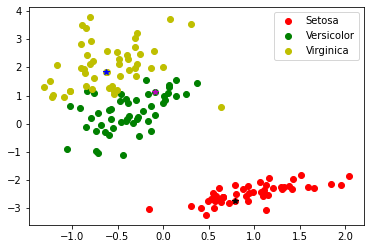

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label = 'Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label = 'Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label = 'Virginica');
plt.plot(new_mds[6,0],new_mds[6,1],'*k')
plt.plot(new_mds[56,0],new_mds[56,1],'*m')
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend();

### การใช้ Pre-computed Distance Matrix

In [ ]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric='cityblock')

In [ ]:
mds2 = MDS(n_components=2,dissimilarity='precomputed')

In [ ]:
new_mds2 = mds2.fit_transform(dis_matrix)

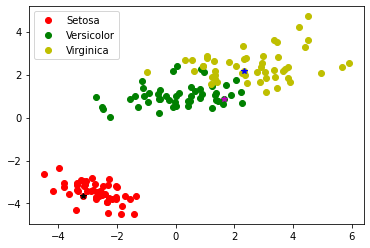

In [ ]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1],'or',label = 'Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og',label = 'Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1],'oy',label = 'Virginica');
plt.plot(new_mds2[6,0],new_mds2[6,1],'*k')
plt.plot(new_mds2[56,0],new_mds2[56,1],'*m')
plt.plot(new_mds2[116,0],new_mds2[116,1],'*b')
plt.legend();

## Example 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np # import seaborn ทำให้กราฟสวยงาม

In [ ]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [ ]:
X = make_hello(1000)

In [ ]:
X.shape

(1000, 2)

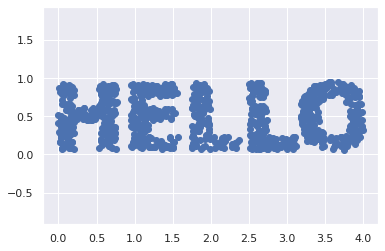

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal'); # ทำให้สเกลของแต่ละแกนมันเท่ากัน

In [ ]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

In [ ]:
colorize['c'].shape

(1000,)

In [ ]:
colorize['cmp']

KeyError: ignored

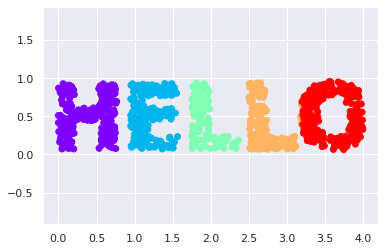

In [ ]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [ ]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

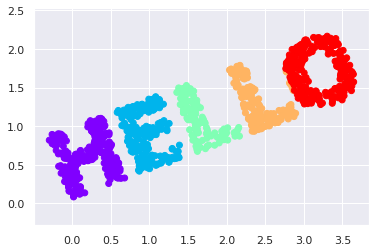

In [ ]:
X2 = rotate(X, 20)
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

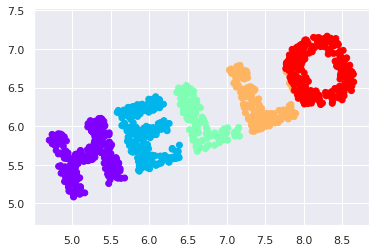

In [ ]:
X2 = rotate(X, 20)+5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

###MDS หาส่วนสำคัญที่สุดของMDS

In [ ]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

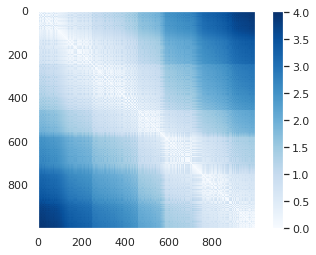

In [ ]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar(); # บอกสแกลว่าแต่ละสีอยู่สแกลไหน จุดที่ 1,1000 ค่ามันห่างกันประมาณ 4 

In [ ]:
D2 = pairwise_distances(X2)

* zorder in plt.imshow
*np.allclose()

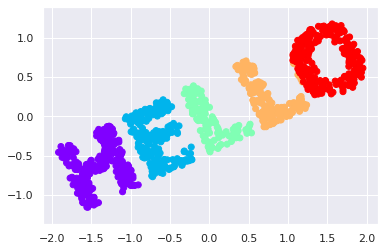

In [ ]:
from sklearn.manifold import MDS

model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

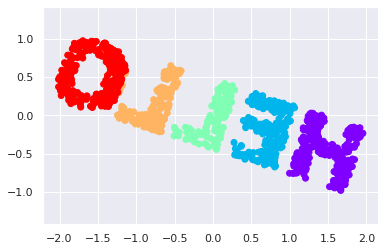

In [ ]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### ทดลองทำ PCA กับข้อมูล X แล้ว plotgraph
### และดูผลว่าการกระจายของข้อมูลมันเปลี่ยนไปหรือไม่ อย่างไร
ส่งก่อน 14:15 commit ว่า Quiz4

In [ ]:
from sklearn.decomposition import PCA

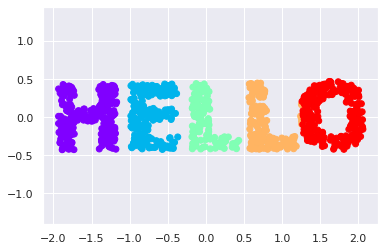

In [ ]:
modal = PCA(n_components=2)
out2 = modal.fit_transform(X2)
plt.scatter(out2[:,0],out2[:,1],**colorize)
plt.axis('equal');

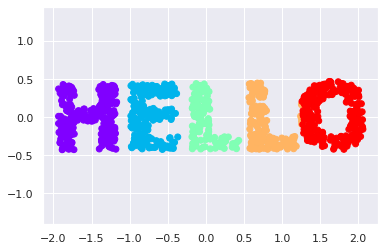

In [ ]:
modal = PCA(n_components=2)
out = modal.fit_transform(out)
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal');